In [4]:
%pip install python-chess

import chess
board = chess.Board()

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: C:\Users\nguye\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R


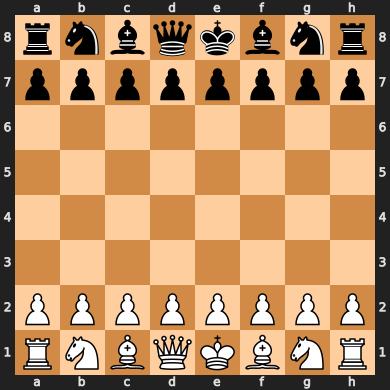

In [5]:
print(board)
board

In [6]:
for move in board.legal_moves:
    print(move)

g1h3
g1f3
b1c3
b1a3
h2h3
g2g3
f2f3
e2e3
d2d3
c2c3
b2b3
a2a3
h2h4
g2g4
f2f4
e2e4
d2d4
c2c4
b2b4
a2a4


# Mỗi nước đi được kí hiệu 4 kí tự và được chia làm 2 phần 
+ Ô xuất phát (nơi di chuyển quân cờ)
+ Ô đích (nơi quân cờ đến)
# Ví dụ c2c3 
+ di chuyển quân tốt từ ô c2 đến c3
+ Chúng ta có thể tìm cột có nhãn là c (được gọi là "c file"), và sau đó tìm hàng có nhãn là 2 (được gọi là "2 rank")
+ c3 là ô phía trên c2 là nước đi đúng của quân tốt có

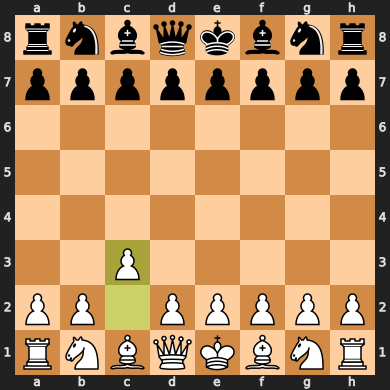

In [7]:
board.push_san('c2c3')

board

In [8]:
for move in board.legal_moves:
    print(move)

g8h6
g8f6
b8c6
b8a6
h7h6
g7g6
f7f6
e7e6
d7d6
c7c6
b7b6
a7a6
h7h5
g7g5
f7f5
e7e5
d7d5
c7c5
b7b5
a7a5


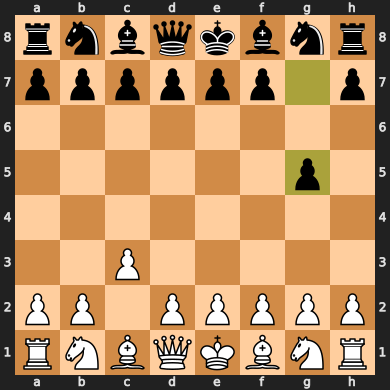

In [9]:
board.push_san('g7g5')
board

In [10]:
#kiểm tra xem bên nào thắng
print(board.outcome())
# nếu là None thì chưa kết thúc
# nếu là 1-0 thì bên trắng thắng
# nếu là 0-1 thì bên đen thắng
# nếu là 1/2-1/2 thì hòa


None


In [11]:
board.fen()
# trả về vị trí các quân cờ trên bàn cờ

'rnbqkbnr/pppppp1p/8/6p1/8/2P5/PP1PPPPP/RNBQKBNR w KQkq - 0 2'

## Hãy cùng phân tích điều này!

* Phần đầu tiên của FEN chỉ cho chúng ta thấy những gì có trên bàn cờ. Mỗi hàng trên bàn cờ của chúng ta được tách ra bằng dấu gạch chéo, vì vậy chúng ta có thể viết lại phần này như sau:
```
 rnbqkbnr 
 pppppp1p 
 8
 6p1
 8
 2P5
 PP1PPPPP
 RNBQKBNR

```
* Để giữ cho mọi thứ gọn gàng, FEN không hiển thị các khoảng trống lặp lại, nó chỉ thay thế chúng bằng một con số. Vì vậy, ví dụ, số 8 ở dòng thứ 3 từ trên xuống có nghĩa là "8 khoảng trống". Chúng ta có thể thay thế tất cả các số bằng số lượng dấu chấm tương ứng, chỉ để làm rõ điều này (đây là định dạng mà python-chess cho chúng ta khi chúng ta chỉ in ra bàn cờ):

In [12]:
print(board)

r n b q k b n r
p p p p p p . p
. . . . . . . .
. . . . . . p .
. . . . . . . .
. . P . . . . .
P P . P P P P P
R N B Q K B N R



+ Phần tiếp theo của FEN sẽ luôn là một chữ w hoặc b, cho biết ai đến lượt. Vì vậy, trong FEN của chúng ta ở trên

rnbqkbnr/pppppp1p/8/6p1/8/2P5/PP1PPPPP/RNBQKBNR w KQkq - 0 2

 + chữ w có nghĩa là lượt đi của trắng.

 + Sau đó, chúng ta có một vài trường cho các quy tắc đặc biệt mà chúng ta sẽ không nói nhiều: nhập thành, en passant, và quy tắc năm mươi nước đi.

 + KQkq có nghĩa là cả đen và trắng đều có thể nhập thành bên vua và bên hậu.
 + '-' có nghĩa là không có nước đi en passant nào khả dụng.
 + 0 có nghĩa là không có nước đi nào kể từ lần bắt hoặc bước tiến của quân tốt.

 + Trường cuối cùng là bộ đếm lượt đi. Bạn có thể thấy bộ đếm lượt của chúng ta đang ở số 2, điều này hợp lý vì trắng đã đi 1 lượt và đen đã đi 1 lượt, tổng cộng là 2!

# Chuẩn bị dữ liệu

Trước khi đưa đầu vào của chúng ta vào một mạng nơ-ron để huấn luyện, chúng ta cần biến tất cả thành các con số.

Khi chúng ta thay thế các con số bằng các dấu chấm, ký hiệu FEN của chúng ta khá gần – đó là một lưới 8x8 các ký tự.
```
r n b q k b n r  
p p p p p p p p  
. . . . . . . .  
. . . . . . . .  
. . . . . . . .  
. . . . . . . .  
P P P P P P P P  
R N B Q K B N R
```  
Một chiến lược phổ biến trong học máy là mã hóa one hot đầu vào của chúng ta. Hiện tại có 13 ký tự khác nhau trên bàn cờ của chúng ta: 6 quân cờ in hoa (trắng), 6 quân cờ in thường (đen) và . cho các không gian trống. Vì vậy, chúng ta có thể mã hóa one-hot đầu vào của mình với một danh sách 13 phần tử, một cho mỗi loại quân cờ:

Đây có thể là mã hóa one hot cho một quân V bishop trắng:
```
 r n b q k p R N B Q K P .  
[0 0 0 0 0 0 0 0 1 0 0 0 0]  
```
Và đây có thể là mã hóa one hot cho một không gian trống:
```

 r n b q k p R N B Q K P .  
[0 0 0 0 0 0 0 0 0 0 0 0 1]  
```
Lưu ý trong cả hai ví dụ, chúng ta chỉ có 1 1, và tất cả các phần còn lại đều là số không.

In [13]:
%pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: C:\Users\nguye\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [14]:
import numpy as np

def one_hot_encode_peice(piece):
    pieces = list('rnbqkpRNBQKP.')
    arr = np.zeros(len(pieces))
    piece_to_index = {p: i for i, p in enumerate(pieces)}
    index = piece_to_index[piece]
    arr[index] = 1
    return arr

# Let's test on a black bishop
one_hot_encode_peice('b')

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [15]:
def encode_board(board):
    # first lets turn the board into a string
    board_str = str(board)
    # then lets remove all the spaces
    board_str = board_str.replace(' ', '')
    board_list = []
    for row in board_str.split('\n'):
        row_list = []
        for piece in row:
            row_list.append(one_hot_encode_peice(piece))
        board_list.append(row_list)
    return np.array(board_list)

# Let's test on the starting board
encode_board(chess.Board())

array([[[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]],

    

In [16]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: C:\Users\nguye\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [17]:
import pandas as pd

train_df = pd.read_csv('Data/train.csv', index_col= 'id')

val_df = train_df[-1000:]
train_df = train_df[:10000]

train_df.head()

,board,black_score,best_move
id,,,
80091,6R1/8/5K2/8/5k2/8/8/2r5 w - - 89 118,0.0,g8d8
18578,r1bn1rk1/1p2b1p1/1q2p2p/p2p1p1n/P2P3P/2PB1N2/1...,-131.0,f3e5
11580,r2qkb1r/2p2pp1/p1n2nP1/1p1p3p/P7/1Q5b/1PP1PPB1...,-490.0,g6f7
72805,8/4kp2/R6p/8/4K3/8/8/8 b - - 7 85,-574.0,h6h5
74310,8/8/k7/4R3/8/6K1/8/1r6 w - - 99 90,0.0,e5e6


In [18]:
import numpy as np
def encode_fen_string(fen_str):
    board = chess.Board(fen=fen_str)
    return encode_board(board)

# We'll stack all our encoded boards into a single numpy array
X_train = np.stack(train_df['board'].apply(encode_fen_string))
y_train = train_df['black_score']


X_val = np.stack(val_df['board'].apply(encode_fen_string))
y_val = val_df['black_score']

In [19]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: C:\Users\nguye\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [20]:

import tensorflow as tf
print(tf.__version__)


2.18.0


# Building our model

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# With the Keras Sequential model we can stack neural network layers together
model = Sequential([
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1),
])

model.compile(
    optimizer='rmsprop',
    loss='mean_squared_error')

In [24]:
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    validation_data=(X_val, y_val))

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 104819.6172 - val_loss: 126572.3516
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 107904.8672 - val_loss: 125336.2891
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 109115.8281 - val_loss: 124224.3984
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 107529.2734 - val_loss: 125739.9453
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 105603.8750 - val_loss: 122825.4375
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 107224.8828 - val_loss: 122873.9766
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 103670.8203 - val_loss: 121875.8750
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 104614.7969 - val_loss: 121649.2109
Epoch 9/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 103610.7422 - val_loss: 121318.8516
Epoch 10/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 107023.0312 - val_loss: 120529.9609
Epoch 11/50
313/313 ━━━━━━━━━━━━━━━━━━━

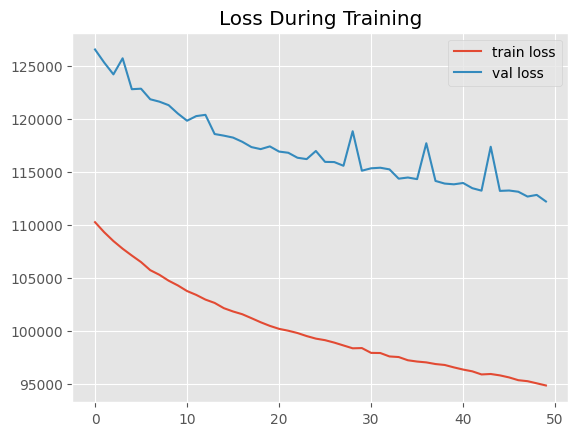

In [25]:
import matplotlib.pyplot as plt

# Lets plot the history of our training session to see how things progressed over time
plt.style.use('ggplot')
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss During Training')
plt.show()

In [26]:
from IPython.display import SVG, display

def play_game(ai_function):
    board = chess.Board()

    while board.outcome() is None:
        # We print out the board as an SVG
        display(SVG(board._repr_svg_()))

        # If it's white's turn, we have the user play
        if board.turn == chess.WHITE:
            user_move = input('Your move: ')
            if user_move == 'quit':
                break
            # The move a user puts in isn't a valid move, we keep prompting them for a valid move
            while user_move not in [str(move) for move in board.legal_moves]:
                print('That wasn\'t a valid move. Please enter a move in Standard Algebraic Notation')
                user_move = input('Your move: ')
            board.push_san(user_move)

        # If it's black's turn, we have the AI play
        elif board.turn == chess.BLACK:
            ai_move = ai_function(board.fen())
            print(f'AI move: {ai_move}')
            board.push_san(ai_move)
    print(board.outcome())


In [27]:
def play_nn(fen, show_move_evaluations=False, player='b'):
    # We can create a python-chess board instance from the FEN string like this:
    board = chess.Board(fen=fen)

    # And then evaluate all legal moves
    moves = []
    for move in board.legal_moves:
        # For each move, we'll make a copy of the board and try that move out
        candidate_board = board.copy()
        candidate_board.push(move)
        input_vector = encode_board(str(candidate_board)).astype(np.int32).flatten()
        
        # This is where our model gets to shine! It tells us how good the resultant score board is for black:
        score = model.predict(np.expand_dims(input_vector, axis=0), verbose=0)[0][0]
        moves.append((score, move))
        if show_move_evaluations:
            print(f'{move}: {score}')
    
    # By default sorting our moves will put the lowest scores at the top.
    # This would give us the right answer if we were playing as white,
    # but if we're playing as black we want to reverse things (then grab the first move):
    best_move = sorted(moves, reverse=player=='b')[0][1]

    # Now we turn our move into a string, return it and call it a day!
    return str(best_move)

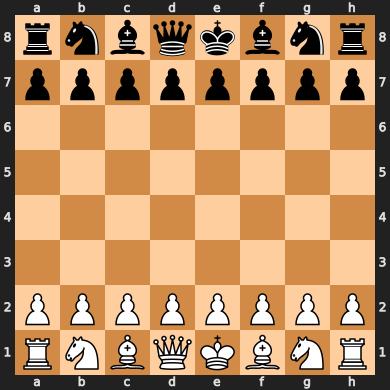

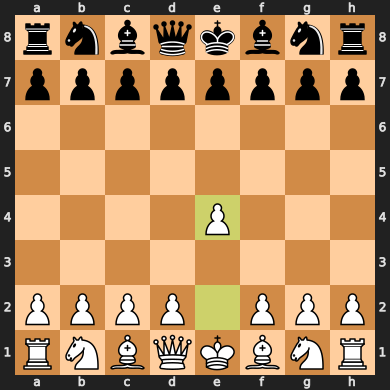

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("sequential_1_1/Cast:0", shape=(1, 832), dtype=float32). Expected shape (None, 8, 8, 13), but input has incompatible shape (1, 832)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 832), dtype=int32)
  • training=False
  • mask=None

In [29]:
play_game(play_nn)